# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [30]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [34]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [38]:
#scrape
html = browser.html
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [40]:
# Extract all rows of data
table = soup.find('table', class_="table")


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [222]:
# Create and populate a header list
header_list = []
rows = table.find_all('th')
rows

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [358]:
# convert header_list element to strings
for row in rows:
    header_list.append(row.text)

In [237]:
rows = table.find_all('tr', class_="data-row")

In [239]:
dict_list_for_dataframe = []
val_list=[]
for row in rows:
    val_list.append(row)

In [244]:
# Create and populate a list of value lists
list_of_val_lists = []
tmp_list=[]
for val in val_list:
    val = val.text.strip()
    tmp_list = val.split("\n")
    list_of_val_lists.append(tmp_list)
    tmp_list=[]

In [271]:
# Create and populate a dictionary to use for pandas dataframe using the header_list and listof_val_lists
tmp_dict={}
tmp_dict_generator=[]
dict_list_for_dataframe=[]
for val_list in list_of_val_lists:
    tmp_dict_generator = zip(header_list, val_list)
    for key, val in tmp_dict_generator:
        tmp_dict[key] = val
    dict_list_for_dataframe.append(tmp_dict)
    tmp_dict={}

In [273]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(dict_list_for_dataframe)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [275]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [278]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [280]:
# Change data types for data analysis
df1 = df.astype({
    'sol': 'int32', 
    'ls': 'int32', 
    'month': 'int32',
    'min_temp': 'float64', 
    'pressure':'float64'})
df1.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [282]:
# Confirm type changes were successful by examining data types again
df1.dtypes

id                   object
terrestrial_date     object
sol                   int32
ls                    int32
month                 int32
min_temp            float64
pressure            float64
dtype: object

In [284]:
# Change date to datetime
df1['terrestrial_date'] = pd.to_datetime(df1['terrestrial_date'])
df1.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [296]:
# Calculate the number of months in a martian year
df1['month'].max()

12

### There are 12 months in a martian year

In [298]:
# Calculate the number of  sols (Martian days) worth of data
len(df1['sol'].unique())

1867

### There are 1867 sols of data in this data data set

In [304]:
# Calculate the average minimum temperature by month
monthly_avg_temp = df1.groupby('month')['min_temp'].mean()
monthly_avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [322]:
# convert series to df and rename columns
monthly_avg_temp_df = pd.DataFrame({'month':monthly_avg_temp.index, 'temp':monthly_avg_temp.values})

Text(0.5, 1.0, 'Average Minimum Temperature by Month')

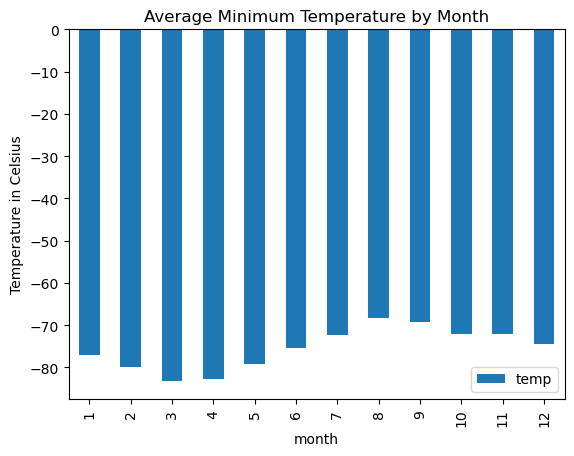

In [320]:
# Plot the average minimum temperature by month
ax = monthly_avg_temp_df.plot.bar(x='month', y='temp')
ax.set_xlabel("month")
ax.set_ylabel("Temperature in Celsius")
ax.set_title("Average Minimum Temperature by Month")

Text(0.5, 1.0, 'Average Minimum Temperature by Month')

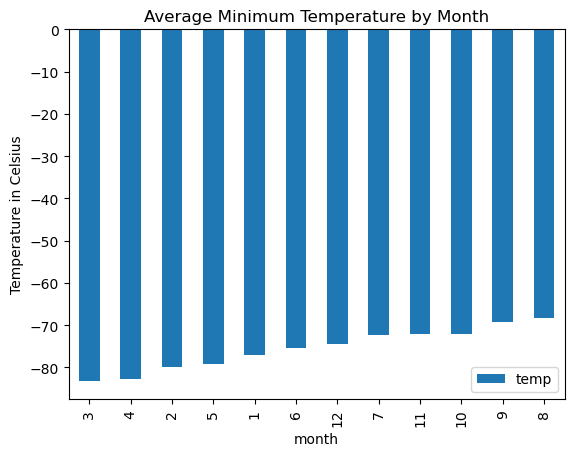

In [334]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
monthly_avg_temp_sorted_df = monthly_avg_temp_df.sort_values(by=['temp'],ascending=True)
ax = monthly_avg_temp_sorted_df.plot.bar(x='month', y='temp')
ax.set_ylabel("Temperature in Celsius")
ax.set_title("Average Minimum Temperature by Month")

In [337]:
# Calculate the average pressure by month?
monthly_avg_pressure = df1.groupby('month')['pressure'].mean()
monthly_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [339]:
# convert series to df and rename columns
monthly_avg_pressure_df = pd.DataFrame({'month':monthly_avg_pressure.index, 'pressure':monthly_avg_pressure.values})

Text(0.5, 1.0, 'Average Pressure by Month')

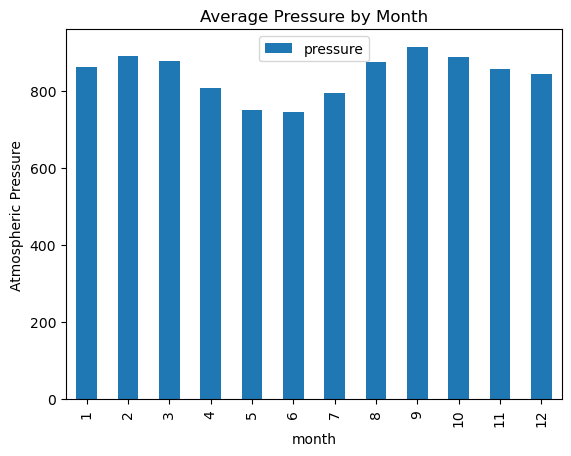

In [341]:
# Plot the average pressure by month
ax = monthly_avg_pressure_df.plot.bar(x='month', y='pressure')
ax.set_xlabel("month")
ax.set_ylabel("Atmospheric Pressure")
ax.set_title("Average Pressure by Month")

Text(0.5, 1.0, 'Average Pressure by Month')

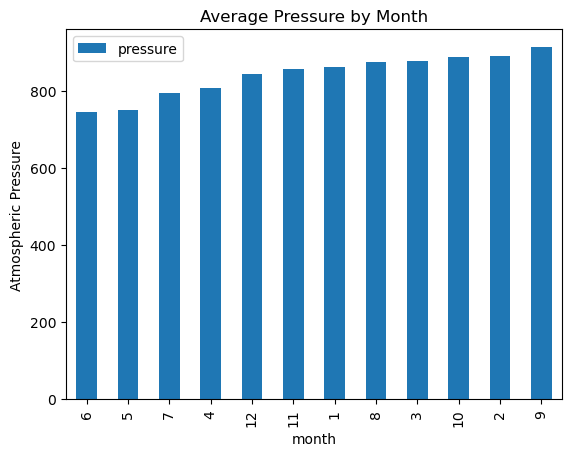

In [347]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
monthly_avg_pressure_sorted_df = monthly_avg_pressure_df.sort_values(by=['pressure'],ascending=True)
ax = monthly_avg_pressure_sorted_df.plot.bar(x='month', y='pressure')
ax.set_ylabel("Atmospheric Pressure")
ax.set_title("Average Pressure by Month")

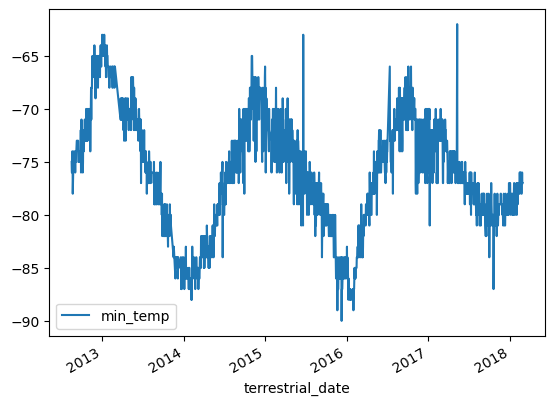

In [356]:
ax = df1.plot(x='terrestrial_date', y='min_temp')
ax.set_xlabel("terrestial_date")
ax.set_ylabel("Minimum Temperature")
ax.set_title("Minimum Temperature Over Time")

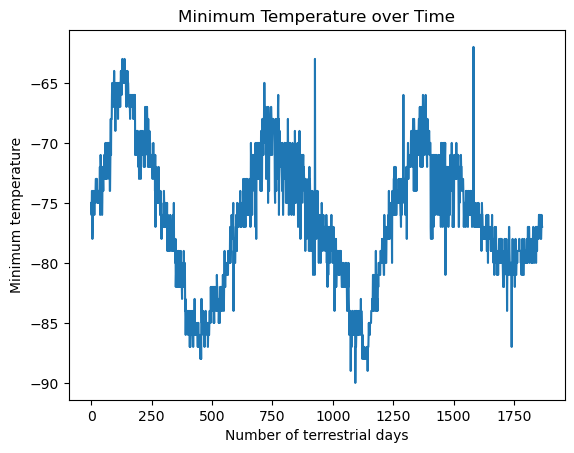

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


#### Minimum Temperature
In this data, the coldest martian month, by average temperature, is month 3.
The warmerst martian month, by average temperature, is month 8

#### Atmospheric Pressure
In this data, martian month 6 has the lowest average atmospheric pressure
Month 9 has the highest average atmosperic pressure

#### Year Length
Assumption: The lowest temperature occurs at the martian winter solstice. Therefore, the number of days from one temperature minimum to the next is also the number of days fron one solstice to the next, or one martian year. By visual estimation this is about 675 days. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [360]:
# Write the data to a CSV
df1.to_csv('mars_facts.csv', sep=',', index=False, header=True)

In [363]:
browser.quit()